<a href="https://colab.research.google.com/github/makhmudjumanazarov/deep_learning/blob/main/MNIST_with_Tensorflow_for_me_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

In [179]:
from keras.datasets import mnist 

In [180]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [181]:
print(x_train.shape, y_train.shape) 
print(x_test.shape, y_test.shape)  

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


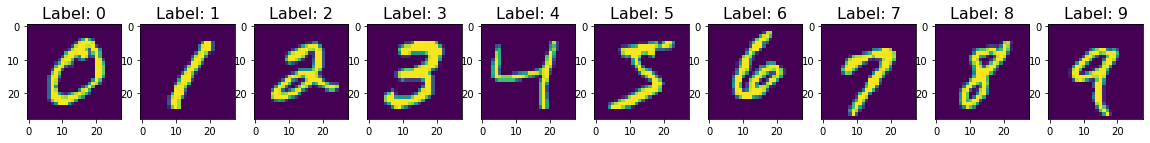

In [182]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize  = (20, 20)) 

for  i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample)
  ax[i].set_title("Label: {}".format(i), fontsize = 16) 

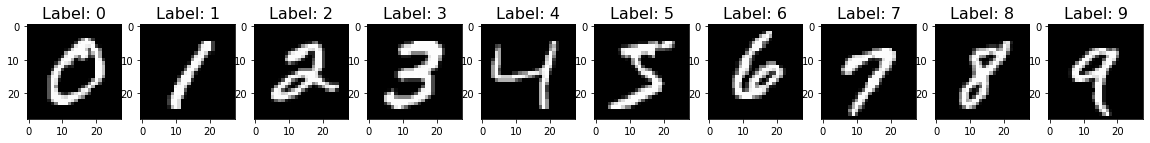

In [183]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize  = (20, 20)) 

for  i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap = 'gist_gray')
  ax[i].set_title("Label: {}".format(i), fontsize = 16)  

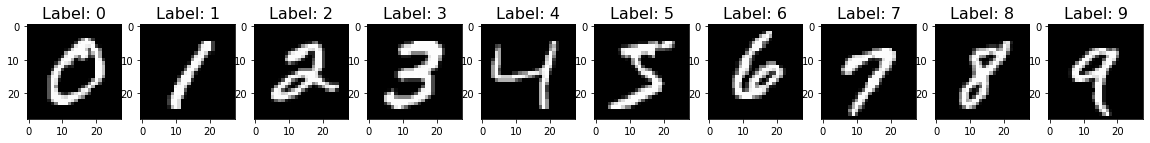

In [184]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize  = (20, 20)) 

for  i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap = 'gray')
  ax[i].set_title("Label: {}".format(i), fontsize = 16)   

In [185]:
list1  =  []
for i  in range(10000):
  list1.append(y_train[i])        

In [186]:
#list1 

In [187]:
data = pd.DataFrame(list1, columns=['raqam'])      

In [188]:
data .value_counts()

raqam
1        1127
7        1070
3        1032
6        1014
0        1001
2         991
4         980
9         978
8         944
5         863
dtype: int64

In [189]:
list1  =  []
for i  in range(60000):
  list1.append(y_train[i])           

In [190]:
data = pd.DataFrame(list1, columns=['raqam'])      

In [191]:
data .value_counts()  # pashti balancedlik buzilmagan

raqam
1        6742
7        6265
3        6131
2        5958
9        5949
0        5923
6        5918
8        5851
4        5842
5        5421
dtype: int64

In [192]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [138]:
#for i in range(10):
  #print(y_train[i]) 

In [193]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [194]:
x_train[1][10] 

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.188, 0.933, 0.988, 0.988, 0.702, 0.047, 0.294, 0.475, 0.082,
       0.   , 0.   , 0.992, 0.953, 0.196, 0.   , 0.   , 0.   , 0.   ,
       0.   ])

In [195]:
x_train.shape

(60000, 28, 28)

In [196]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [197]:
x_train.shape  

(60000, 784)

In [198]:
x_test.shape 

(10000, 784)

In [199]:
y_train.shape 

(60000, 10)

In [172]:
#y_train = y_train.reshape(y_train.shape[0], -1)
#x_test = x_test.reshape(x_test.shape[0], -1) 

In [200]:
y_train.shape

(60000, 10)

In [201]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()  

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dense_25 (Dense)            (None, 128)               16512     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [202]:
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 2s 10ms/step - loss: 0.5838 - accuracy: 0.8332
Epoch 2/10
118/118 [==============================] - 1s 10ms/step - loss: 0.2213 - accuracy: 0.9369
Epoch 3/10
118/118 [==============================] - 1s 10ms/step - loss: 0.1619 - accuracy: 0.9525
Epoch 4/10
118/118 [==============================] - 2s 17ms/step - loss: 0.1270 - accuracy: 0.9626
Epoch 5/10
118/118 [==============================] - 2s 16ms/step - loss: 0.1059 - accuracy: 0.9683
Epoch 6/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0892 - accuracy: 0.9740
Epoch 7/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0774 - accuracy: 0.9766
Epoch 8/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0653 - accuracy: 0.9803
Epoch 9/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0582 - accuracy: 0.9828
Epoch 10/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0520 - accura

In [212]:
model_loss = pd.DataFrame(model.history.history)

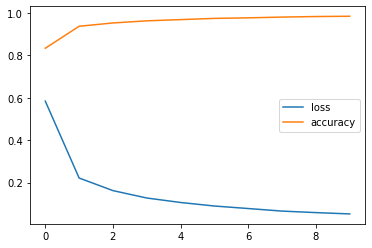

In [213]:
model_loss.plot()        

In [218]:
test_loss, test_acc = model.evaluate(x_test, y_test)  
print('Test Loss: {}, Test Accuracy: {}'.format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0760 - accuracy: 0.9754
Test Loss: 0.07603313773870468, Test Accuracy: 0.9753999710083008


In [221]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
print(y_pred) 

313/313 [==============================] - 1s 3ms/step
[[0.    0.    0.    ... 1.    0.    0.   ]
 [0.    0.001 0.999 ... 0.    0.    0.   ]
 [0.    0.999 0.    ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]


In [222]:
print(y_pred_classes) 

[7 2 1 ... 4 5 6]


In [223]:
len(y_pred_classes) 

10000

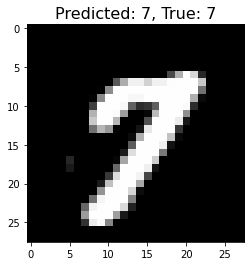

In [247]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title('Predicted: {}, True: {}'.format(y_sample_pred_class, y_sample_true), fontsize = 16)
plt.imshow(x_sample.reshape(28, 28), cmap = 'gray')
    

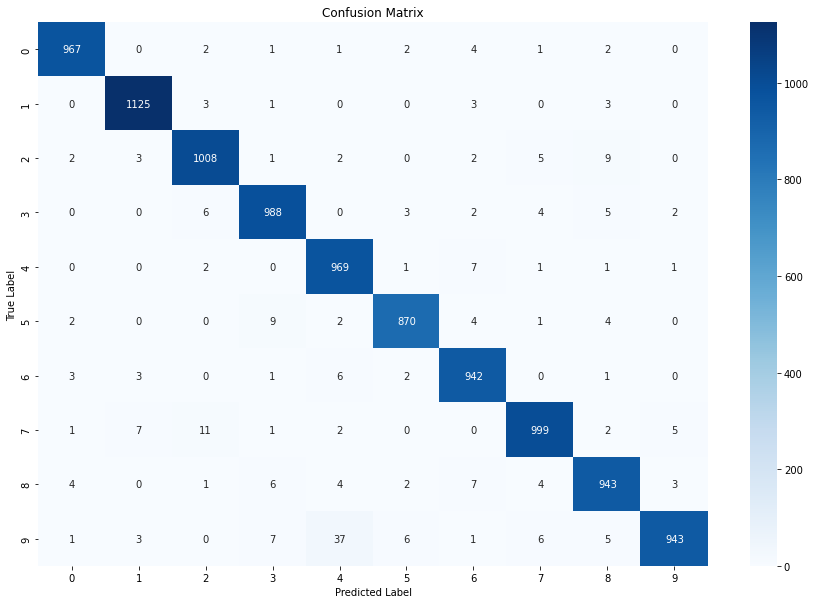

In [257]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(confusion_mtx, annot = True, fmt = 'd', ax = ax, cmap = 'Blues')  
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

In [269]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors] 
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [261]:
y_pred_classes_errors

array([4, 5, 8, 5, 6, 0, 7, 3, 4, 7, 0, 4, 2, 8, 6, 8, 1, 3, 4, 8, 7, 4,
       6, 2, 9, 4, 0, 5, 8, 2, 3, 6, 6, 1, 8, 4, 2, 4, 5, 1, 4, 7, 3, 9,
       3, 7, 1, 9, 7, 6, 6, 6, 7, 3, 0, 2, 8, 3, 4, 2, 3, 2, 9, 9, 9, 0,
       7, 4, 8, 1, 4, 2, 6, 0, 6, 2, 8, 1, 3, 4, 4, 4, 4, 1, 4, 1, 8, 0,
       1, 4, 4, 3, 4, 7, 0, 2, 5, 5, 1, 7, 2, 3, 1, 4, 2, 0, 3, 4, 2, 3,
       8, 6, 8, 4, 8, 4, 4, 4, 1, 4, 4, 4, 6, 2, 2, 5, 3, 1, 4, 8, 4, 8,
       3, 4, 4, 7, 9, 7, 8, 3, 4, 7, 7, 4, 4, 4, 6, 7, 4, 8, 5, 4, 2, 7,
       6, 3, 4, 4, 8, 4, 4, 1, 2, 6, 6, 6, 8, 3, 8, 8, 7, 6, 4, 0, 3, 8,
       3, 8, 3, 9, 5, 9, 3, 3, 3, 5, 8, 6, 6, 5, 9, 4, 3, 6, 1, 7, 4, 5,
       9, 6, 4, 4, 8, 8, 2, 2, 2, 6, 8, 1, 8, 5, 8, 4, 6, 5, 6, 6, 4, 0,
       6, 2, 2, 2, 2, 5, 4, 4, 3, 7, 7, 5, 3, 7, 8, 6, 2, 6, 0, 0, 4, 8,
       7, 4, 8, 6])

In [262]:
len(errors) 

10000

In [263]:
len(y_pred_classes_errors)  

246

In [266]:
len(y_pred_errors) 

246

In [268]:
y_true_errors

array([9, 9, 9, 9, 4, 6, 2, 5, 9, 3, 6, 9, 8, 2, 4, 2, 2, 7, 8, 5, 8, 9,
       8, 0, 8, 5, 6, 6, 5, 7, 9, 4, 4, 6, 6, 9, 7, 9, 9, 7, 5, 5, 8, 7,
       5, 9, 7, 7, 8, 4, 2, 0, 3, 9, 8, 7, 2, 8, 9, 7, 8, 7, 7, 4, 7, 2,
       3, 6, 9, 6, 9, 1, 1, 8, 9, 0, 5, 9, 8, 9, 9, 6, 9, 2, 2, 7, 2, 9,
       6, 9, 9, 5, 9, 4, 8, 3, 9, 3, 9, 9, 1, 5, 9, 6, 3, 5, 9, 8, 7, 8,
       5, 4, 2, 9, 7, 2, 0, 9, 7, 9, 9, 9, 5, 1, 4, 3, 5, 7, 9, 9, 7, 0,
       9, 9, 9, 2, 7, 9, 2, 5, 9, 2, 9, 9, 9, 9, 0, 8, 9, 9, 6, 9, 7, 8,
       4, 8, 6, 9, 0, 9, 8, 7, 3, 3, 3, 1, 1, 2, 1, 7, 3, 8, 7, 7, 5, 3,
       5, 3, 5, 3, 3, 3, 9, 9, 9, 9, 9, 8, 0, 0, 8, 9, 1, 2, 7, 0, 8, 0,
       8, 1, 9, 6, 4, 3, 3, 3, 3, 8, 1, 2, 2, 8, 3, 6, 0, 9, 8, 8, 9, 8,
       8, 7, 7, 7, 7, 8, 9, 9, 0, 9, 2, 4, 6, 9, 2, 5, 4, 5, 2, 5, 9, 2,
       2, 9, 3, 5])

In [271]:
len(x_test_errors)     

246

In [281]:
y_pred_errors_probability = np.max(y_pred_errors, axis = 1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis = 1)) 
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors 

sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:]

In [273]:
y_pred_errors_probability

array([0.497, 0.566, 0.884, 0.513, 0.503, 0.678, 0.854, 0.857, 0.927,
       0.891, 0.997, 0.549, 0.934, 0.568, 0.447, 0.536, 0.418, 0.507,
       0.978, 0.968, 0.708, 0.553, 0.74 , 0.731, 0.716, 0.972, 0.746,
       0.919, 0.776, 0.692, 0.449, 0.987, 0.622, 0.6  , 0.618, 0.578,
       0.976, 0.724, 0.678, 0.83 , 0.589, 0.958, 0.835, 0.313, 0.949,
       0.398, 0.39 , 0.774, 0.938, 0.931, 0.989, 0.584, 0.999, 0.399,
       0.971, 0.603, 0.564, 0.675, 0.984, 0.556, 0.616, 0.751, 0.75 ,
       0.684, 0.462, 0.609, 0.527, 0.683, 0.359, 0.859, 0.568, 0.821,
       0.497, 0.899, 0.986, 0.711, 0.388, 0.947, 0.526, 0.55 , 0.596,
       0.531, 0.652, 0.934, 0.905, 0.65 , 0.588, 0.687, 0.997, 0.874,
       0.551, 0.681, 0.83 , 0.634, 0.398, 0.942, 0.779, 0.716, 0.345,
       0.47 , 0.914, 0.562, 0.995, 0.989, 0.735, 0.85 , 0.86 , 0.592,
       0.839, 0.42 , 0.833, 0.893, 0.718, 0.591, 0.659, 0.51 , 0.569,
       0.725, 0.52 , 0.868, 0.727, 0.975, 0.492, 0.76 , 0.611, 0.826,
       0.583, 0.595,

In [276]:
true_probability_errors

array([0.495, 0.42 , 0.102, 0.396, 0.018, 0.31 , 0.089, 0.141, 0.069,
       0.086, 0.002, 0.448, 0.015, 0.397, 0.421, 0.438, 0.139, 0.316,
       0.009, 0.029, 0.151, 0.445, 0.211, 0.253, 0.271, 0.006, 0.179,
       0.008, 0.126, 0.127, 0.287, 0.012, 0.327, 0.39 , 0.194, 0.359,
       0.007, 0.137, 0.003, 0.15 , 0.211, 0.039, 0.071, 0.237, 0.032,
       0.22 , 0.335, 0.139, 0.028, 0.006, 0.006, 0.415, 0.001, 0.318,
       0.016, 0.301, 0.325, 0.308, 0.003, 0.105, 0.271, 0.243, 0.218,
       0.314, 0.299, 0.39 , 0.027, 0.102, 0.283, 0.064, 0.431, 0.167,
       0.481, 0.007, 0.001, 0.289, 0.242, 0.028, 0.447, 0.096, 0.386,
       0.391, 0.302, 0.065, 0.039, 0.151, 0.406, 0.063, 0.   , 0.122,
       0.438, 0.306, 0.169, 0.333, 0.341, 0.037, 0.003, 0.261, 0.342,
       0.305, 0.082, 0.022, 0.001, 0.007, 0.145, 0.12 , 0.097, 0.401,
       0.124, 0.404, 0.167, 0.093, 0.26 , 0.408, 0.035, 0.138, 0.259,
       0.272, 0.405, 0.131, 0.26 , 0.025, 0.364, 0.089, 0.067, 0.173,
       0.416, 0.325,

In [278]:
diff_errors_pred_true

array([0.003, 0.146, 0.782, 0.117, 0.485, 0.368, 0.765, 0.715, 0.858,
       0.805, 0.994, 0.101, 0.919, 0.17 , 0.026, 0.097, 0.279, 0.191,
       0.969, 0.939, 0.557, 0.108, 0.529, 0.479, 0.445, 0.966, 0.566,
       0.911, 0.651, 0.564, 0.161, 0.976, 0.295, 0.21 , 0.424, 0.219,
       0.969, 0.587, 0.675, 0.681, 0.378, 0.919, 0.764, 0.075, 0.917,
       0.178, 0.056, 0.635, 0.909, 0.925, 0.983, 0.169, 0.997, 0.081,
       0.955, 0.302, 0.24 , 0.367, 0.981, 0.451, 0.345, 0.508, 0.532,
       0.37 , 0.163, 0.219, 0.5  , 0.581, 0.076, 0.796, 0.137, 0.655,
       0.015, 0.892, 0.985, 0.422, 0.145, 0.919, 0.078, 0.454, 0.21 ,
       0.141, 0.35 , 0.869, 0.867, 0.499, 0.182, 0.624, 0.997, 0.752,
       0.113, 0.376, 0.662, 0.301, 0.057, 0.904, 0.776, 0.455, 0.004,
       0.165, 0.832, 0.54 , 0.994, 0.983, 0.59 , 0.73 , 0.763, 0.192,
       0.714, 0.016, 0.666, 0.8  , 0.458, 0.183, 0.625, 0.371, 0.31 ,
       0.453, 0.115, 0.736, 0.467, 0.951, 0.128, 0.67 , 0.544, 0.653,
       0.167, 0.27 ,

In [280]:
sorted_idx_diff_errors

array([216,   0,  98, 149, 192,  72, 109,  14, 182, 191, 232, 231,  46,
        94, 203, 205,  43,  68,  78, 151, 146,  53,  15, 161,  11, 139,
        21,  90, 118,   3, 206, 194, 122,  70, 202,  81,  76,   1,  30,
        64,  99, 126,  51,  13,  45,  86, 113, 243,  17, 107, 187, 208,
        33,  80, 226,  35,  65, 234, 152, 141, 236,  56, 169, 196, 213,
       204, 127, 241,  16, 197, 185, 153,  32, 244,  93,  55, 116, 215,
       154,  60, 198,  82, 142, 140, 167,  57,   5,  63, 115, 201,  91,
        40, 163, 219, 144, 179,  75,  34, 130, 211, 136, 162, 172, 233,
       173, 166,  24,  59, 164, 117,  79, 188,  97, 112, 217, 120, 237,
        23,   4,  85, 199,  66,  61, 207, 186, 131,  22,  62, 180, 101,
       195, 124, 159,  20,  29,  26, 223, 183,  67,  37, 212, 104, 156,
       184,  87, 114,  47, 176, 171, 238,  28, 125,  71, 229,  92, 110,
       123, 174, 242, 134,  38,  39, 138, 181, 157, 108,   7, 148, 105,
       119,  89, 129, 106,  42,   6, 230, 143,  96,   2, 228, 20

In [282]:
top_idx_diff_errors

array([102,  10,  88,  52, 227])

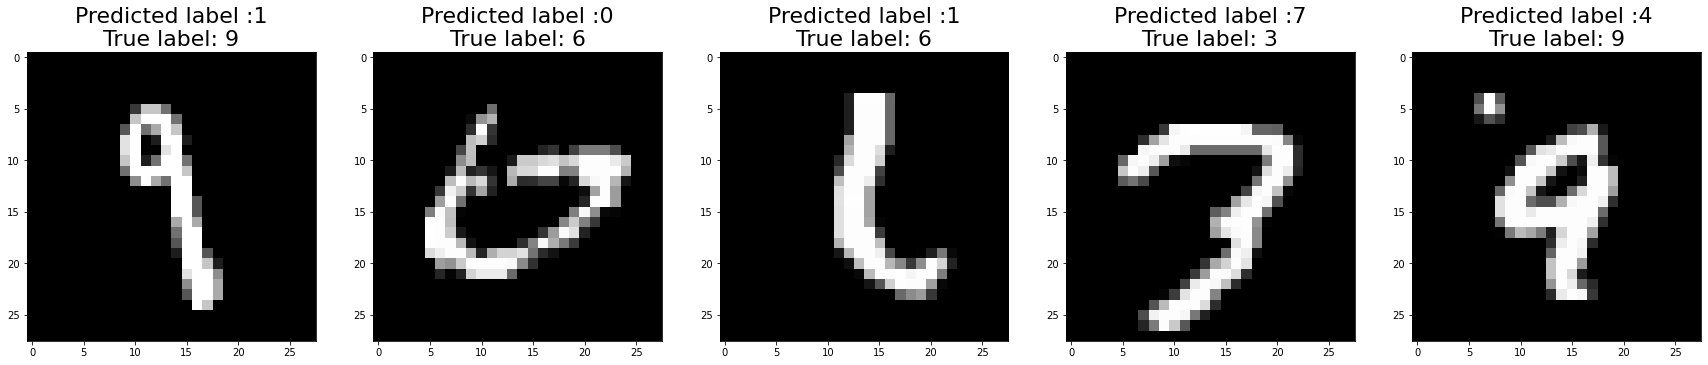

In [293]:
num = len(top_idx_diff_errors)

f, ax = plt.subplots(1, num, figsize = (30, 30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28) 
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap = 'gray') 
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)